In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df = pd.read_csv("monthly_milk_production.csv",index_col = 'Date', parse_dates = True)
df.index.freq = 'MS'

In [76]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

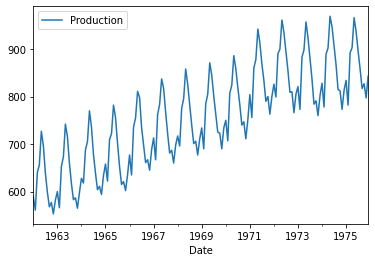

In [77]:
df.plot()

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
len(df)

168

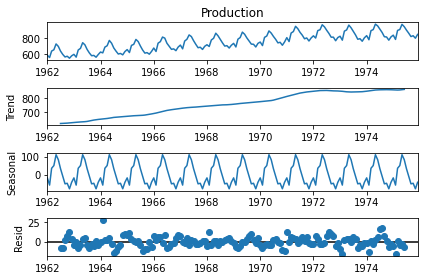

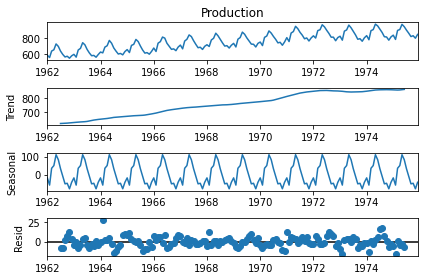

In [80]:
res = seasonal_decompose(df['Production'])
res.plot()

In [81]:
#no need to check for stationrity since RNN doesnt require stationary data

In [82]:
#splitting the dataset into traing set and testing set 
#basically, using last 12 months for testing and remaining for training

In [83]:
train_data = df.iloc[:156]
test_data = df.iloc[156:]

In [84]:
from sklearn.preprocessing import MinMaxScaler#scalinmg the data in between 0 and 1
scaler = MinMaxScaler()

In [85]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [86]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


You can see that the data in the starting rows varying from 500 to 800
but in the bottom region it lies between 700-900 so we will scale the
data using MINmaxscaler

In [87]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [88]:
scaled_train_data#now the data lies between 0 and 1

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [89]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [90]:
#defining generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data,length = n_input,batch_size = 1)

In [91]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Presict this test: \n{y}')



Given the Array: 
[0.08653846 0.01923077 0.20913462]
Presict this test: 
[[0.24759615]]


In [92]:
X.shape

(1, 3, 1)

In [93]:
n_input = 12
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data,length = n_input,batch_size = 1)

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [95]:
#defining model
model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = 'mse')

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [143]:
# fitting the model
model.fit(generator, epochs = 80)

Epoch 1/80
144/144 [==============================] - 2s 9ms/step - loss: 0.0021
Epoch 2/80
144/144 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 3/80
144/144 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 4/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 5/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 6/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 7/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 8/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 9/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 10/80
144/144 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 11/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 12/80
144/144 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 13/80
144/144 [====

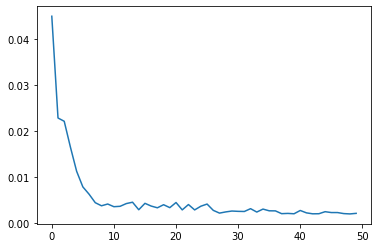

In [98]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [99]:
last = scaled_train_data[-12:]


In [100]:
last = last.reshape((1,n_input,n_features))

In [101]:
model.predict(last)

array([[0.6752282]], dtype=float32)

In [102]:
scaled_test_data[0]

array([0.67548077])

In [127]:
test_predictions =[]
first_eval = scaled_train_data[-n_input:]
current_batch = first_eval.reshape((1,n_input,n_features))

In [128]:
for i in range(len(test_data)):
    #get the prediction value for the current batch

    current_pred = model.predict(current_batch)[0]
    #append the value from above into the array
    test_predictions.append(current_pred)
    #remove the first value 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [129]:
test_predictions

[array([0.6752282], dtype=float32),
 array([0.65523756], dtype=float32),
 array([0.8335678], dtype=float32),
 array([0.9012052], dtype=float32),
 array([1.0084453], dtype=float32),
 array([0.99855345], dtype=float32),
 array([0.92877495], dtype=float32),
 array([0.8262766], dtype=float32),
 array([0.7162174], dtype=float32),
 array([0.6756909], dtype=float32),
 array([0.6274045], dtype=float32),
 array([0.66173637], dtype=float32)]

In [130]:
test_data['Production'].reset_index()

,Date,Production
0,1975-01-01,834
1,1975-02-01,782
2,1975-03-01,892
3,1975-04-01,903
4,1975-05-01,966
5,1975-06-01,937
6,1975-07-01,896
7,1975-08-01,858
8,1975-09-01,817
9,1975-10-01,827


Since we want the value in the range as the original data have but we are getting the values between 0 and 1 so lets do the inverse transformation

In [131]:
actual_predict = scaler.inverse_transform(test_predictions)

In [132]:
actual_predict

array([[833.89492226],
       [825.57882309],
       [899.76420403],
       [927.90135574],
       [972.51322937],
       [968.39823723],
       [939.3703804 ],
       [896.73106575],
       [850.94643784],
       [834.08740997],
       [814.00027657],
       [828.28232956]])

In [133]:
test_data['Predictions'] = actual_predict

<ipython-input-133-5d52f05495d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = actual_predict


<AxesSubplot:xlabel='Date'>

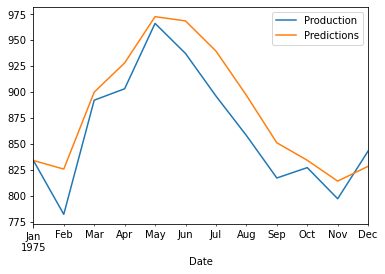

In [134]:
test_data.plot()

In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [138]:
rmse = sqrt(mean_squared_error(test_data['Production'],test_data['Predictions']))

In [139]:
print("the root mean square error is",rmse)

the root mean square error is 26.92126374847145


In [140]:
from sklearn.metrics import r2_score

In [141]:
r2 = r2_score(test_data['Production'],test_data['Predictions'])

In [142]:
print("The r2_score is",r2)

The r2_score is 0.7529854400873699
